<a href="https://colab.research.google.com/github/GiangTTran/SparseRandomModeDecomposition/blob/main/examples/frequency_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Frequency estimation with SRMD

Decomposes a composite signal with two pure sinusoids at 5 Hz and 20 Hz into
its two modes.

Results are plotted and the center frequencies are estimated.

In [ ]:
# download module from github
%pip install git+https://github.com/GiangTTran/SparseRandomModeDecomposition.git#egg=srmdpy

  Cloning https://github.com/GiangTTran/SparseRandomModeDecomposition.git to /tmp/pip-install-x_3xus6l/srmdpy_64afad538fec4a148206a4c57abd8ab6
  Running command git clone -q https://github.com/GiangTTran/SparseRandomModeDecomposition.git /tmp/pip-install-x_3xus6l/srmdpy_64afad538fec4a148206a4c57abd8ab6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for srmdpy: filename=srmdpy-0.0.1-py3-none-any.whl size=9816 sha256=2d9326cd9d8a239acdba6329a0b603a157defcd497b340870c69a1d9916b67d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-hm94qqhe/wheels/5b/89/54/7798db729d46561a5ecaef26ca37c2f67537ef21a8c732e2d5
Successfully built srmdpy


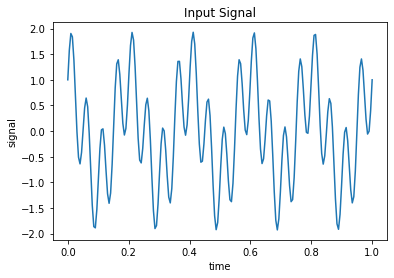

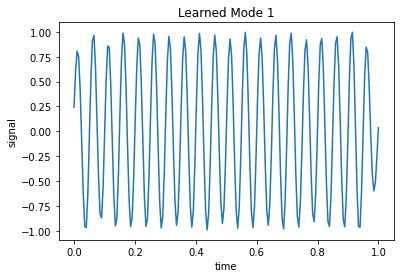

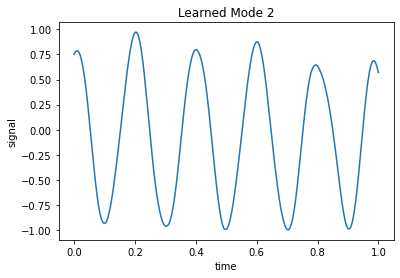

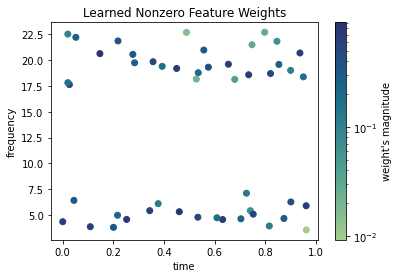

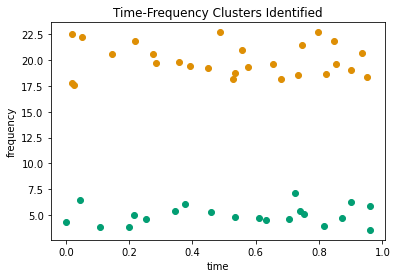

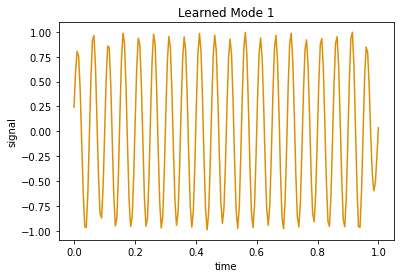

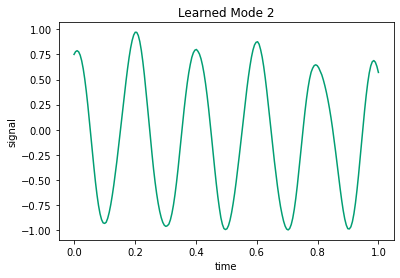


Estimated Mode 1 Frequency: 20.00 Hz
Estimated Mode 2 Frequency: 5.02 Hz


In [ ]:
import numpy as np

from srmdpy import SRMD
import srmdpy.visualization as plot

# set seed for reproducibility
seed = 314

# Define function to decompose
t = np.linspace(0,1,num=200)
f = np.cos(2*np.pi*5*t) + np.sin(2*np.pi*20*t)
plot.signal(t, f, title='Input Signal')

# Run Sparse Random Mode Decomposition
kargs = {'eps':1, 'frq_scale':1, 'seed':seed}
modes = SRMD(f, t, **kargs)

# Plot learned modes
print('')
plot.all_modes(t, modes, title='Learned Mode')

# Return all feature information
kargs['return_features'] = True
_, (tau, frq, phs), weights, labels = SRMD(f, t, **kargs)

# Plot the learned weights in time frequency space
print('')
plot.weights(tau, frq, weights, labels,
             title='Learned Nonzero Feature Weights')

# Plot the clusters and modes corresponding to those clusters
print('')
plot.modes_with_cluster(t, modes, tau, frq, labels)

# Calculate center frequencies
print('')
for l in set(labels):
    if l == -1:
        continue
    mode_index = np.equal(labels, l)
    print(f'Estimated Mode {l+1} Frequency: {np.mean(frq[mode_index]):.2f} Hz')